# Dinámica de metapoblación

Observando la dinámica de metapoblación en acción.

In [1]:
# Módulos necesarios
import numpy as np
import seaborn
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from copy import deepcopy

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
%matplotlib nbagg

C:\Anaconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
np.set_printoptions(precision=3)

### Paisaje

In [5]:
%run genera_tipo_matriz_agroecologica.py

In [6]:
paisaje1 = genera_tipo_matriz_agroecologica(x_celdas = 10, y_celdas = 10, n_bosque=5, 
                                           posicion_bosque=[(1,1),(1,8),(4,5),(8,1),(8,8)], 
                                           n_milpa=95, posicion_milpa="random")

In [7]:
# Convertir el paisaje a un arreglo numérico para graficar
def paisaje_numerico(paisaje, m_milpa, m_intensivo):    
    paisaje_numerico = deepcopy(paisaje)
    for i in range(len(paisaje)):
            for j in range(len(paisaje[0])):
                if paisaje[i][j] == 'b': paisaje_numerico[i][j] = 1.
                if paisaje[i][j] == 'm': paisaje_numerico[i][j] = 1-m_milpa
                if paisaje[i][j] == 'i': paisaje_numerico[i][j] = 1-m_intensivo
    paisaje_numerico = np.array(paisaje_numerico)
    return paisaje_numerico

In [9]:
paisaje1_num = paisaje_numerico(paisaje1, 0.3, 0.6)

<IPython.core.display.Javascript object>


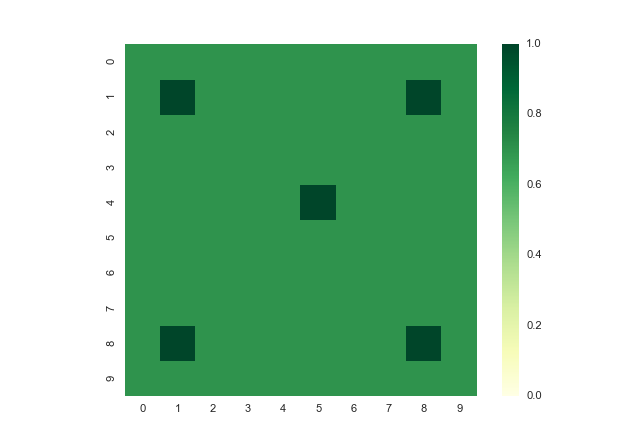

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [10]:
seaborn.heatmap(paisaje1_num, cmap = "YlGn", vmin = 0, square=True)

### Comunidad

In [11]:
condiciones_iniciales = np.loadtxt("osFri-Jan-30-114717-2015-c.txt")
tasas_reproduccion = np.loadtxt("osFri-Jan-30-114717-2015-v.txt")
matriz_interacciones = np.loadtxt("osFri-Jan-30-114717-2015-m.txt")

### Identidades

In [ ]:
%run vector_identidades_2.py

In [ ]:
identidades = vector_identidades_2(matriz_interacciones)
print identidades

### Parámetros comunes y funciones

In [12]:
# Obtenemos el número de especies de la matriz de interacciones, que debe ser cuadrada
n_especies = matriz_interacciones.shape[1]

Disp = {'b':0.3, 'm':1.0, 'i':1.0} #tasas dipersión para el modelo original

m_milpa = 0.3 # tasa muerte negra
m_intensivo = 0.6 # tasa muerte blanca

t_total = 500 #tiempo total de simulacion
iter_difymuerte = 1 #iteraciones de dif y muerte entre cada una de lotka volterra

In [13]:
%run genera_poblacion_inicial.py

In [14]:
poblacion_0 = genera_poblacion_inicial(paisaje1, n_especies, 
                                       p0_bosque = condiciones_iniciales, p0_milpa=0, 
                                       p0_intensivo=0)

<string>:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
<string>:40: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [17]:
%run modelo.py

In [18]:
%run modelo2.py

### Sistema Lotka-Volterra sin espacio

In [30]:
tiempo = np.linspace(0, t_total,t_total+1)

In [31]:
# manejo = 1.0 (bosque)
lv1 = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
           args=(tasas_reproduccion,matriz_interacciones, 1.0))

# manejo = 0.7 (milpa)
lv2 = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
           args=(tasas_reproduccion,matriz_interacciones, 0.7))

#manejo = 0.4 # intensivo
#z = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
#           args=(tasas_reproduccion,matriz_interacciones,manejo))

### Modelo original

In [21]:
m1_poblacion1 = correr_2DMM(poblacion_0, 
                        paisaje1, 
                        t_total, 
                        n_especies, 
                        d_lotkavolterra_alea, 
                        tasas_reproduccion, 
                        matriz_interacciones, 
                        m_milpa, m_intensivo, Disp, 'vecinos8', iter_difymuerte = 1)

np.save("2015-12-19_m1_poblacion1", m1_poblacion1)

### Modelo 2

In [22]:
m2_poblacion1 = correr_2DMM_2(poblacion_0, 
                        paisaje1, 
                        t_total, 
                        n_especies, 
                        d_lotkavolterra_alea_3, 
                        tasas_reproduccion, 
                        matriz_interacciones,
                        m_milpa, m_intensivo, Disp, 'vecinos8', iter_difymuerte = 1)

np.save("2015-12-19_m2_poblacion1", m2_poblacion1)

### Población en celda

¿Cómo se comporta la población de una especie en distintas celdas, por ejemplo, en una celda de bosque o una celda con manejo agrícola y cómo se compara con el sistema Lotka-Volterra sin espacio?

In [39]:
m2_poblacion1[:, 4, 5, 6].shape

(501,)

<IPython.core.display.Javascript object>


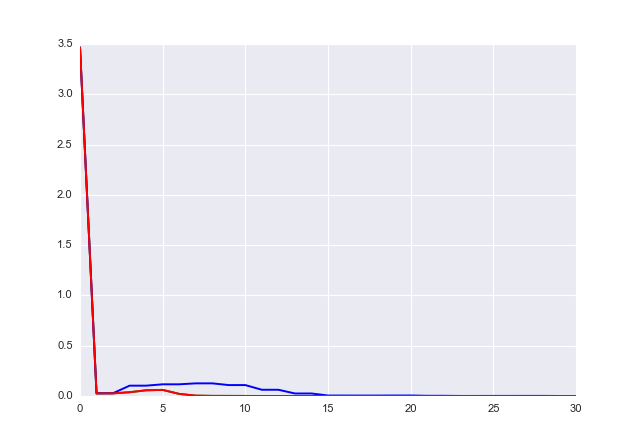

In [51]:
#bosque
fig = plt.figure()
fig.add_subplot(111)
plt.plot(tiempo, lv1[:, 3], color = "green") # [tiempo, especie]
plt.plot(tiempo, m1_poblacion1[:501, 4, 5, 3], color = "blue") # [tiempo, x, y, especie]
plt.plot(tiempo, m2_poblacion1[:, 4, 5, 3], color = "red") # [tiempo, x, y, especie]
plt.xlim(xmax = 30)
plt.show() 

### Medidas de biodiversidad

In [ ]:
% run medidas_biodiversidad.py

In [ ]:
def riqueza_sin_espacio(poblacion, t=-1):
    n_especies = poblacion.shape[1]
    return ((sum([i>0.0001 for i in x[t]]))/(n_especies*1.0))*10

In [ ]:
poblacion1 = np.load("poblacion1_m1.npy")
poblacion2 = np.load("poblacion2_m2.npy")
poblacion3 = np.load("poblacion3_m2.npy")
poblacion4 = np.load("poblacion4_m2.npy")

In [ ]:
tiempo = np.arange(0, 2000)
riqueza1 = np.zeros_like(tiempo)
riqueza2 = np.zeros_like(tiempo)
riqueza3 = np.zeros_like(tiempo)
riqueza4 = np.zeros_like(tiempo)


for t in tiempo:
    riqueza1[t] = riqueza_paisaje(poblacion1, t)[1]
    riqueza2[t] = riqueza_paisaje(poblacion2, t)[1]
    riqueza3[t] = riqueza_paisaje(poblacion3, t)[1]
    riqueza4[t] = riqueza_paisaje(poblacion4, t)[1]

In [ ]:
#Gráficas de riqueza
fig = plt.figure()
fig.add_subplot(111)
plt.plot(tiempo, riqueza1, color="blue")
plt.plot(tiempo, riqueza2, color="green")
plt.plot(tiempo, riqueza3, color="red")
plt.plot(tiempo, riqueza4, color="black")

#plt.ylim(ymax = 10, ymin = 0)
plt.xlim(xmax = 2000)
plt.show() 

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
# (From numericalmooc by Lorena Barba)
from IPython.core.display import HTML
css_file = "C:\Users\hp\Desktop\proyectof\style.css"
HTML(open(css_file, "r").read())